<div style="text-align: center"><img src="https://i.pinimg.com/736x/ca/a1/9c/caa19c132209b22f2595ed2762ce9079.jpg" width="100%" heigh="100%" alt="Retrieve&Re-Rank pipeline"></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/social-media-sentiments-analysis-dataset/sentimentdataset.csv")

# Data Exploration❤️

In [3]:
df.shape

(732, 15)

In [4]:
df.describe().loc[['min', '50%', 'mean', 'max', 'std']].T.style.background_gradient(axis=1)

,min,50%,mean,max,std
Unnamed: 0.1,0.000000,366.500000,366.464481,732.000000,211.513936
Unnamed: 0,0.000000,370.500000,369.740437,736.000000,212.428936
Retweets,5.000000,22.000000,21.508197,40.000000,7.061286
Likes,10.000000,43.000000,42.901639,80.000000,14.089848
Year,2010.000000,2021.000000,2020.471311,2023.000000,2.802285
Month,1.000000,6.000000,6.122951,12.000000,3.411763
Day,1.000000,15.000000,15.497268,31.000000,8.474553
Hour,0.000000,16.000000,15.521858,23.000000,4.113414


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [6]:
df.isna().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [7]:
df_columns = df.columns
for col in df.columns:
    print(col)

Unnamed: 0.1
Unnamed: 0
Text
Sentiment
Timestamp
User
Platform
Hashtags
Retweets
Likes
Country
Year
Month
Day
Hour


In [8]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [9]:
df.duplicated().any()

False

# Visualization on Data📊📊

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

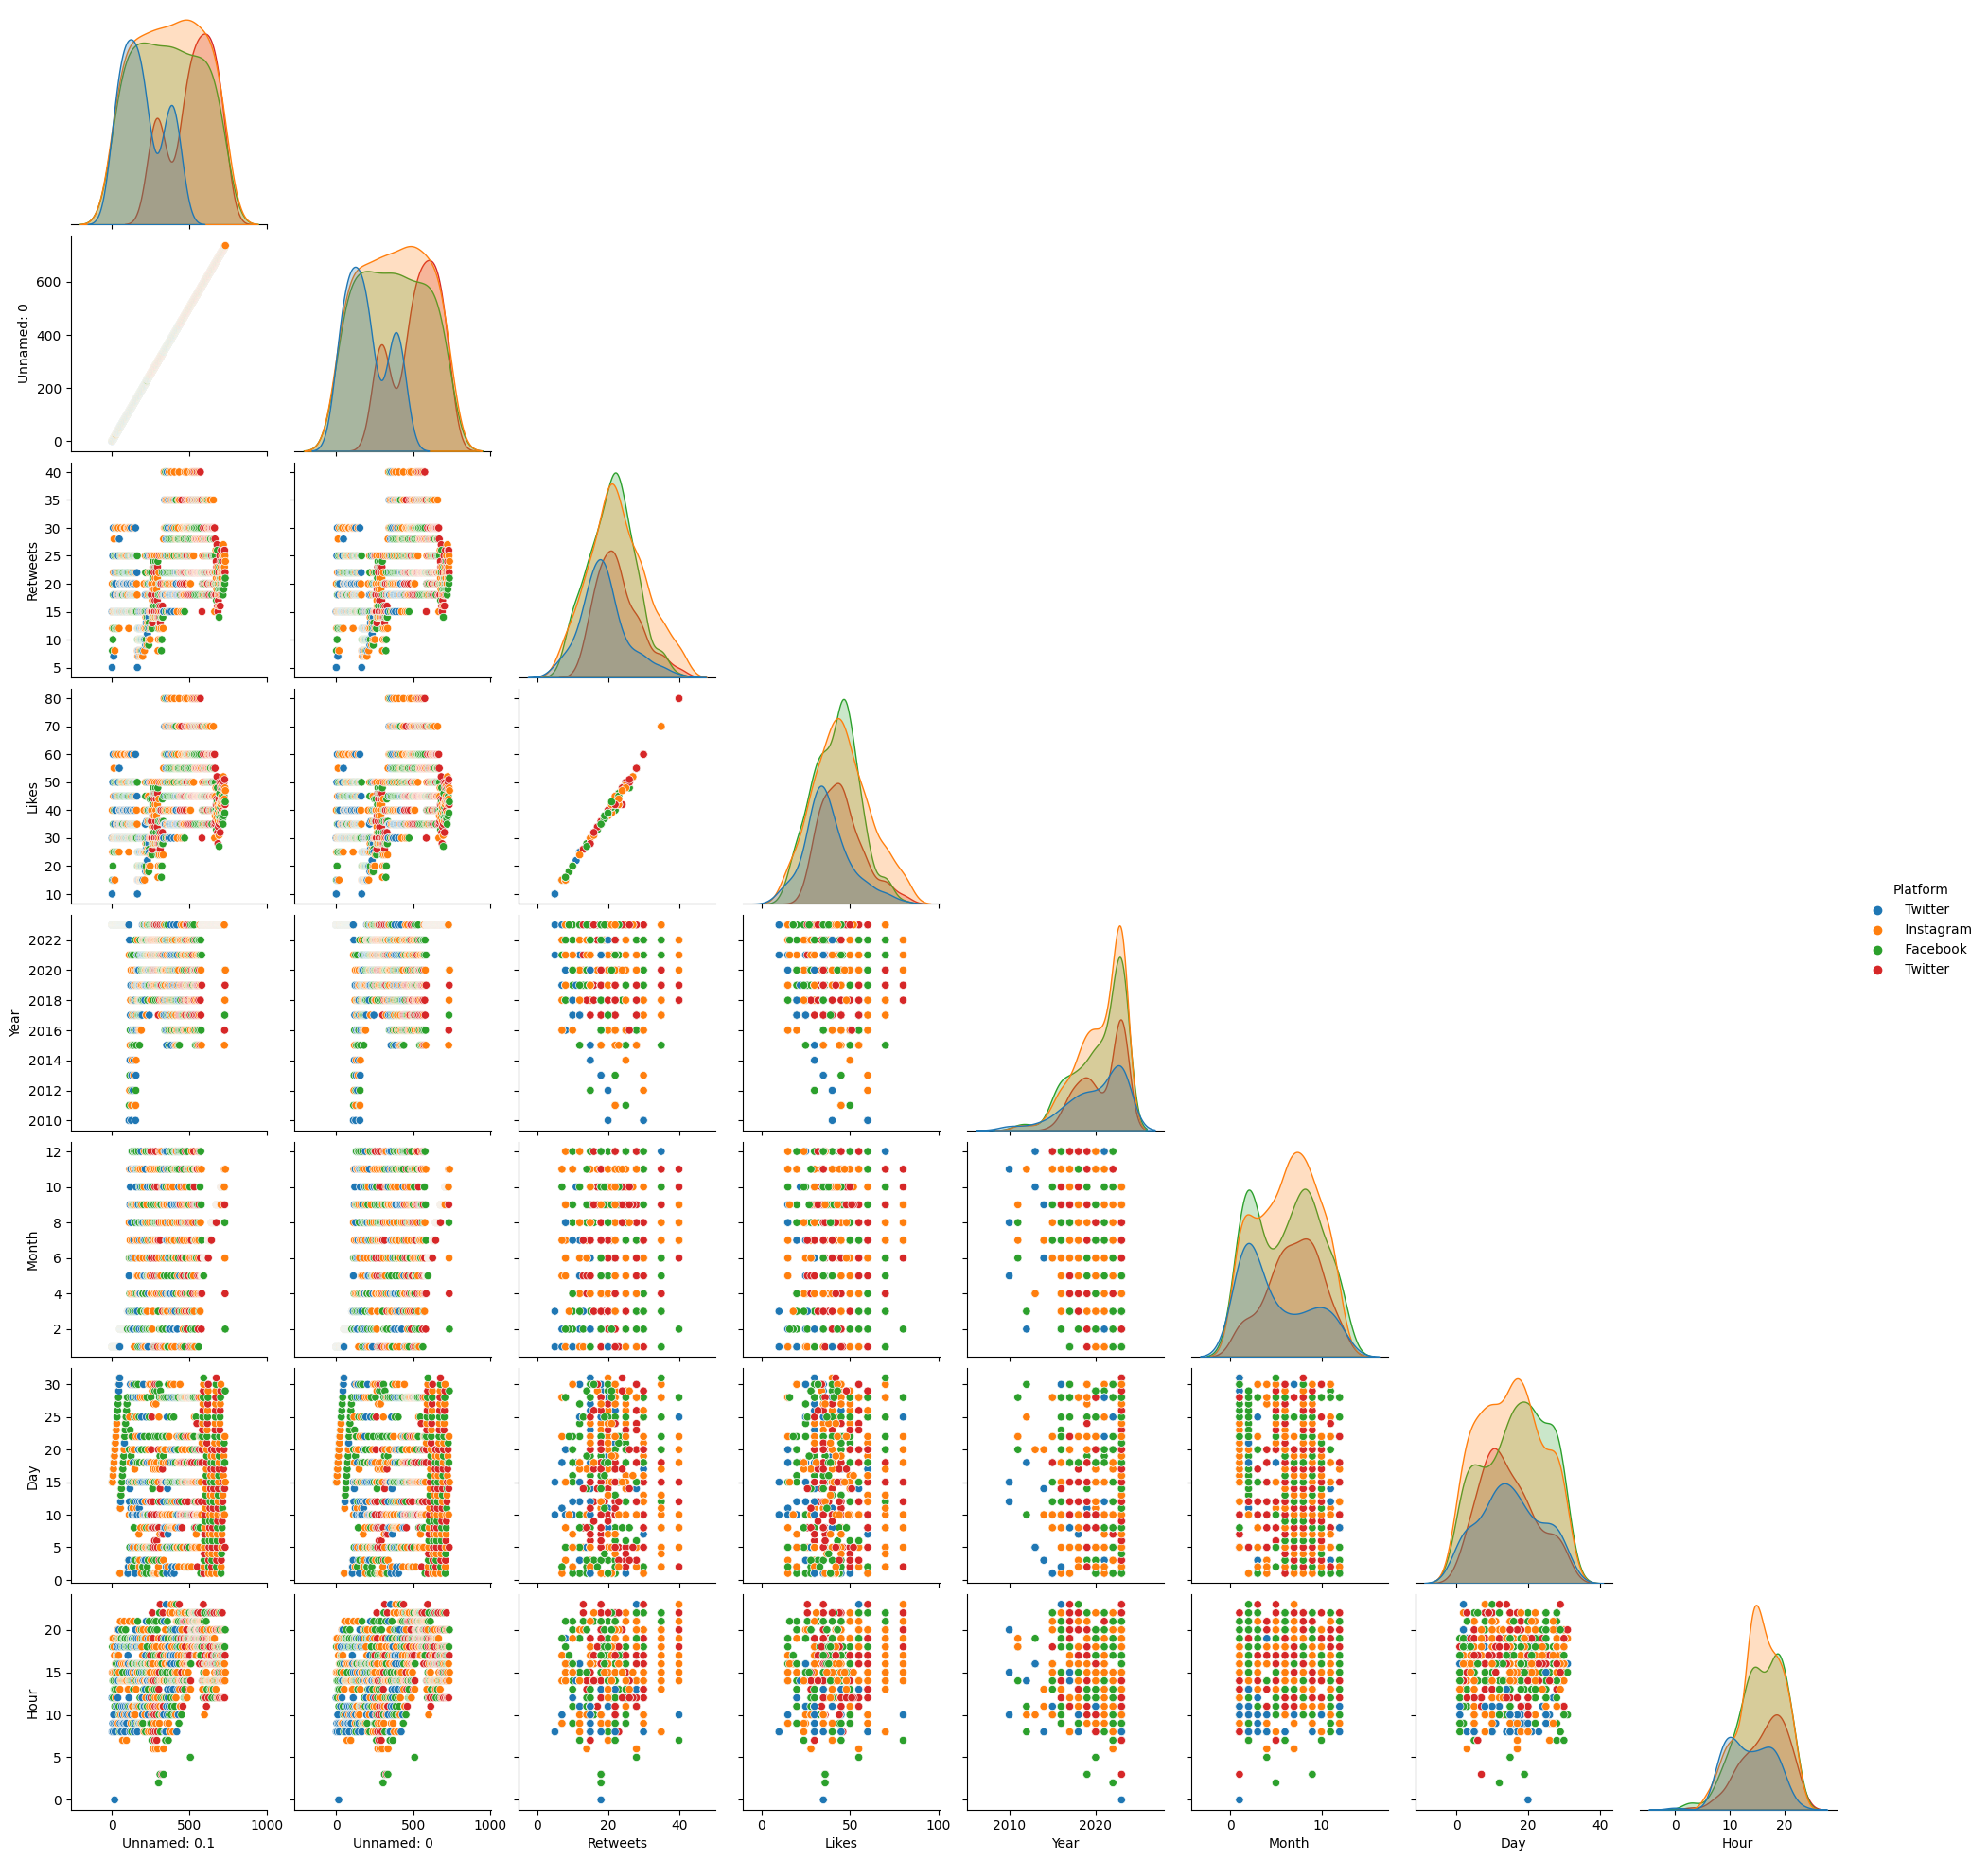

In [10]:
sns.pairplot(df, hue = 'Platform', corner=True)

The `sns.pairplot()` function from the Seaborn library is used to create a `matrix of scatterplots` for a quick visual exploration of relationships between pairs of variables in a DataFrame. The `hue` parameter allows you to color the data points based on a categorical variable, and `corner=True` means that only the lower triangle of the pair plot will be shown.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


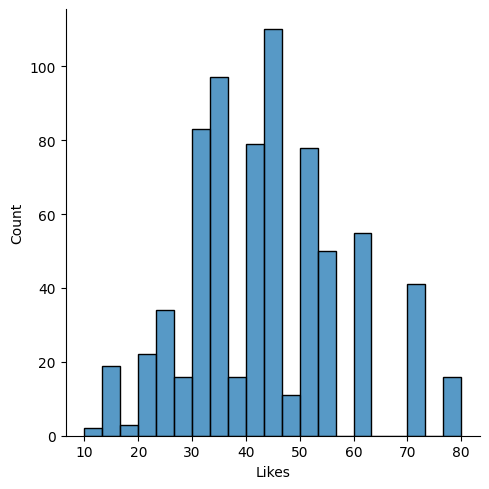

In [11]:
sns.displot(df.Likes)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


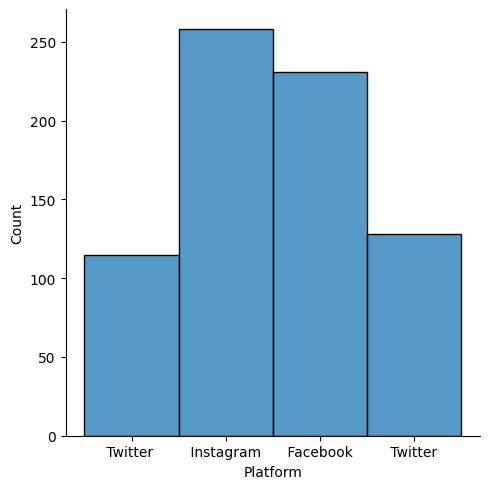

In [12]:
sns.displot(df.Platform, fill=True)

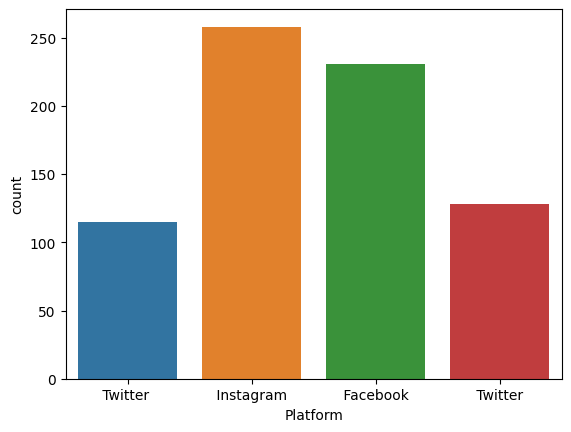

In [13]:
sns.countplot(x = 'Platform', data = df)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'likes_of_platform')

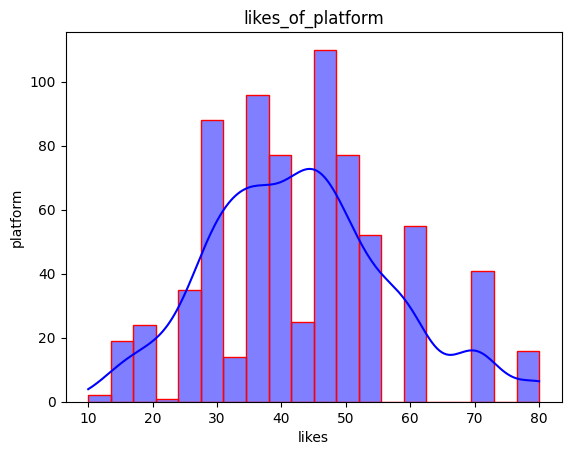

In [14]:
sns.histplot(df['Likes'],bins=20,color='Blue',edgecolor='Red',kde=True)
plt.xlabel("likes")
plt.ylabel("platform")
plt.title("likes_of_platform")

<Axes: xlabel='Hour', ylabel='Likes'>

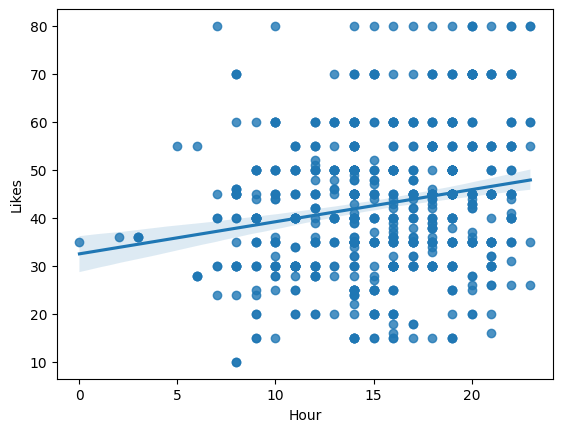

In [15]:
sns.regplot(data = df, x = 'Hour', y = 'Likes')

<Axes: xlabel='Hour', ylabel='Likes'>

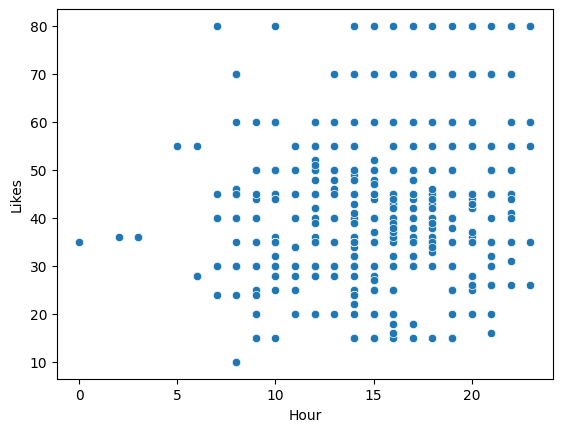

In [16]:
sns.scatterplot(data = df, x = 'Hour', y = 'Likes')

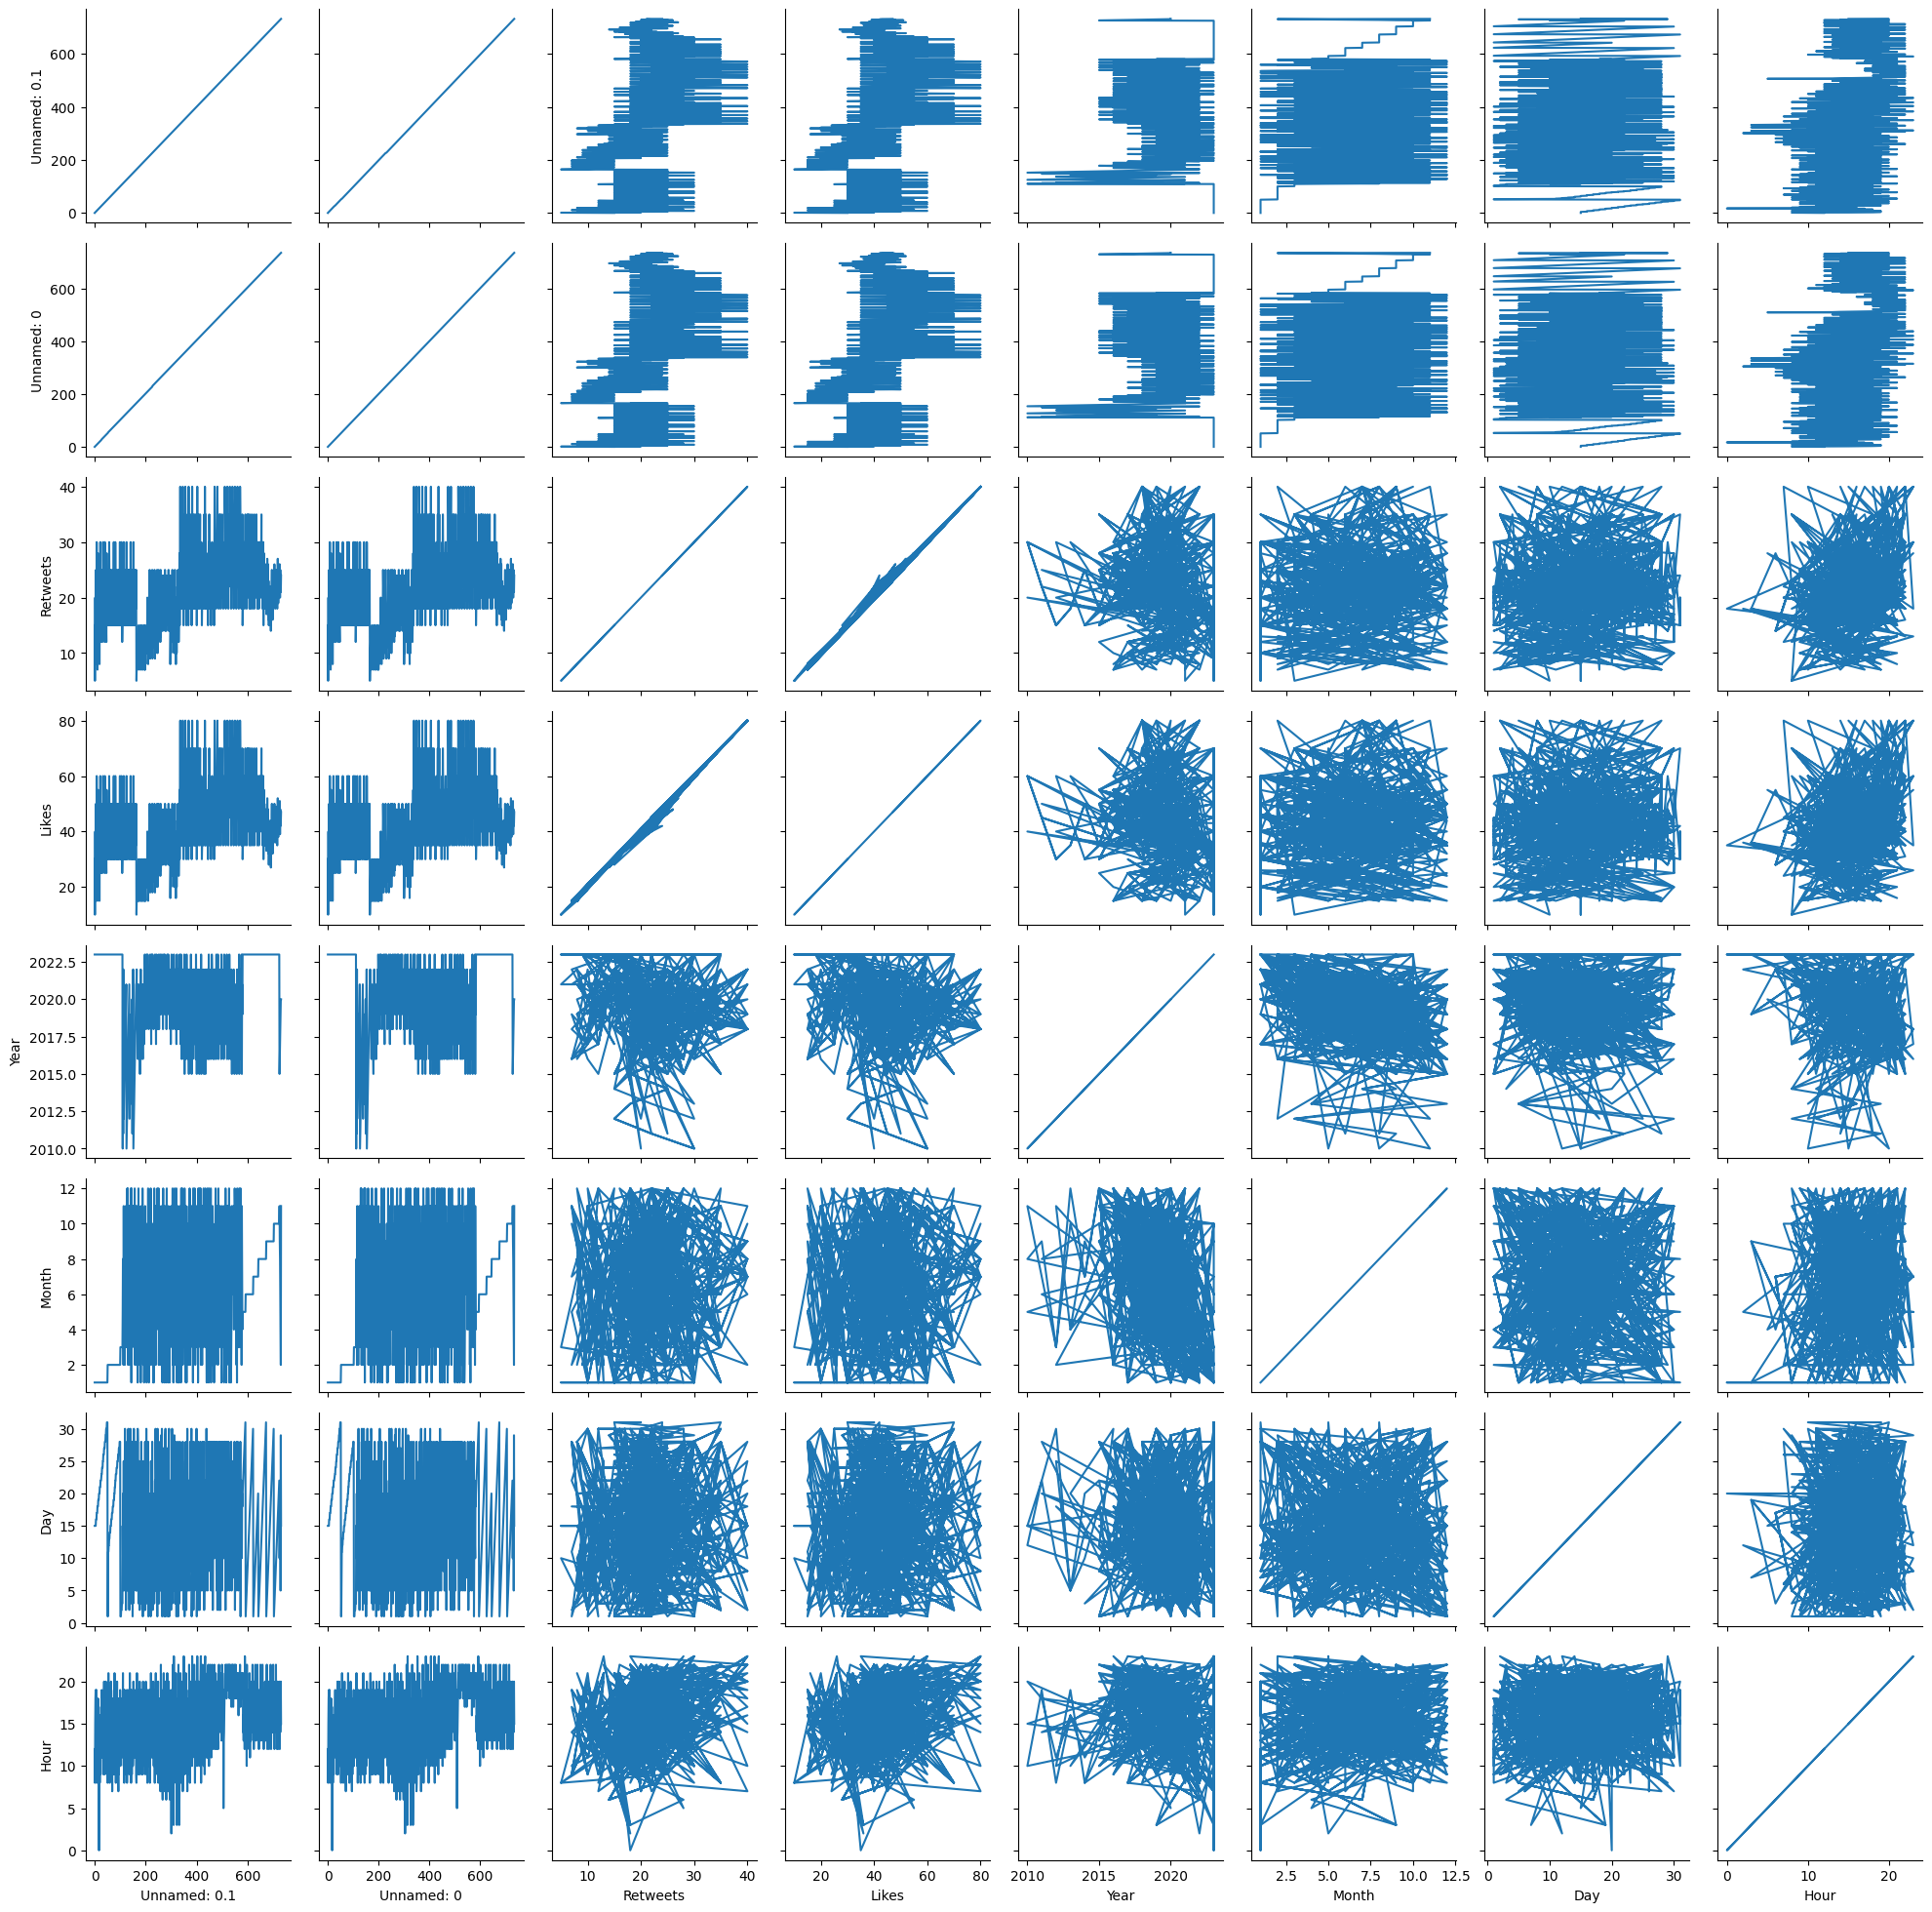

In [17]:
plot = sns.PairGrid(df)
plot.map(plt.plot)
plt.show()

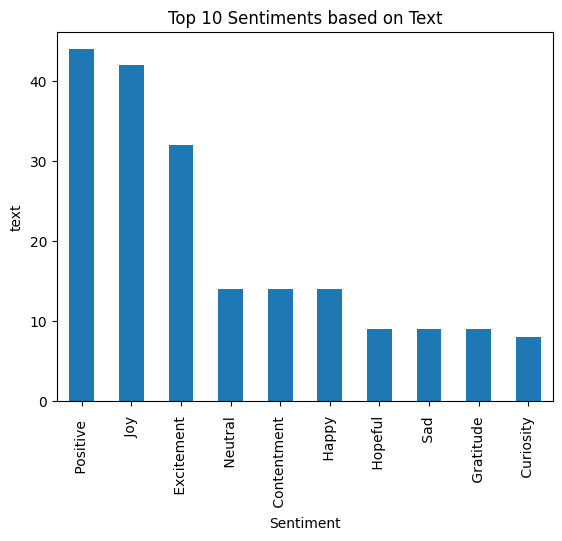

In [18]:
df['Sentiment'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Sentiments based on Text')
plt.xlabel('Sentiment')
plt.ylabel('text')
plt.show()

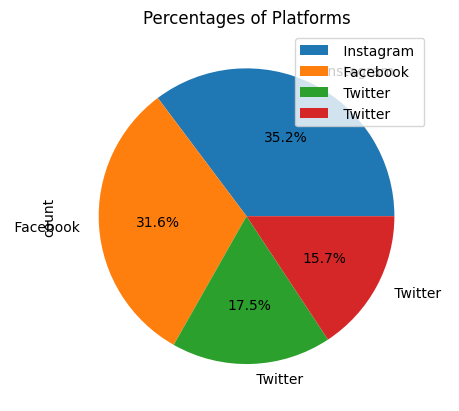

In [19]:
df['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentages of Platforms')
plt.legend()
plt.show()

`df['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')`: 

Plots the counts as a pie chart. `The kind='pie'` specifies the chart type, and `autopct='%1.1f%%' `displays the `percentage labels` on `each pie slice` with one decimal place.

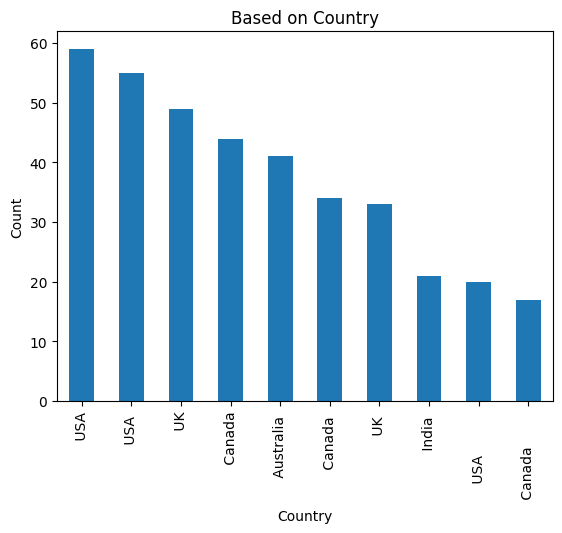

In [20]:
df['Country'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Based on Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

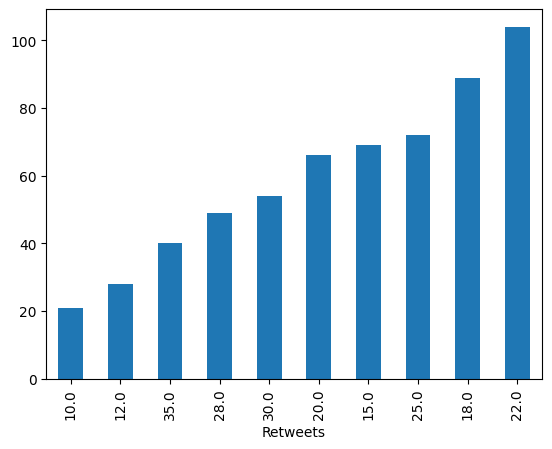

In [21]:
# creating a bar plot for the top 10 hashtags based on the maximum number of retweets associated with each hashtag
H_retweet= df.groupby('Hashtags')['Retweets'].max().value_counts().nlargest(10).sort_values(ascending=True).plot(kind='bar')

**Credit:**

https://www.kaggle.com/code/ahmedraft/social-media-analysis/notebook